## Lab1
### Questions we can use the data to explore:

1.Which airport suffers the worst delays?

2.Within each airport which airline has the most on time or early flights or worst delays?
    *could pick a few states or airports
    
3.When is the best time to fly/What time of day has the worst delays?

### Columns we should keep from the dataset
* dayname
* flightdate
* airline
* origin
* dst
* depdelay
* depdelaygroup
* dtimeblk
* distgroup


In [31]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

import pandas as pd
import numpy as np

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

df = pd.read_csv('https://s2.smu.edu/~tyienger/aaaa-On_Time_On_Time_Performance_2018_1.csv') # read in the csv file

df.head()

Pandas: 0.23.0
Numpy: 1.14.3


,Year,Quarter,Month,monthname,DayofMonth,DayOfWeek,dayname,FlightDate,airline,TailNum,...,FirstDepTime1,FirstDepTime2,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance
0,2018,1,2,February,10,6,Saturday,2018-02-10,Southwest Airlines Co.,N561WN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,2018,1,2,February,10,6,Saturday,2018-02-10,Southwest Airlines Co.,N8612K,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2018,1,2,February,10,6,Saturday,2018-02-10,Southwest Airlines Co.,N8699A,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,2018,1,2,February,10,6,Saturday,2018-02-10,Southwest Airlines Co.,N230WN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,2018,1,2,February,10,6,Saturday,2018-02-10,Southwest Airlines Co.,N931WN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [32]:
for col in ['Year','Quarter','monthname','DayofMonth','DayOfWeek','TailNum','FlightNum','OriginAirportID',
           'OriginCityName','OriginState','OriginStateName','DestAirportID','DestCityName','DestState','DestStateName','CRSDepTime',
           'DepDelayMinutes','TaxiIn','TaxiOut','CRSArrTime','ArrTime','ArrDelay','ArrDelayMinutes','ArrDelayGroup','ATimeBlk','CancellationReason',
            'Diverted', 'AirTime','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','FirstDepTime1','FirstDepTime2',
            'FirstDepTime','TotalAddGTime','LongestAddGTime','DivAirportLandings','DivReachedDest','DivActualElapsedTime','DivArrDelay','DivDistance',
           'CRSElapsedTime','Flights','DepTime']:
    if col in df:
        del df[col]

In [33]:
print(df.dtypes)


Month                  int64
dayname               object
FlightDate            object
airline               object
Origin                object
Dest                  object
DepDelay             float64
DepDelayGroup         object
DTimeBlk              object
Cancelled            float64
ActualElapsedTime    float64
Distance             float64
DistGroup             object
dtype: object


In [34]:
print(df.info(verbose=True, null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1702870 entries, 0 to 1702869
Data columns (total 13 columns):
Month                1702870 non-null int64
dayname              1702870 non-null object
FlightDate           1702870 non-null object
airline              1702870 non-null object
Origin               1702870 non-null object
Dest                 1702870 non-null object
DepDelay             1658772 non-null float64
DepDelayGroup        1658772 non-null object
DTimeBlk             1702870 non-null object
Cancelled            1702870 non-null float64
ActualElapsedTime    1655733 non-null float64
Distance             1702870 non-null float64
DistGroup            1702870 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 168.9+ MB
None


In [35]:
#Figure out what data is missing
df.isnull().sum()


Month                    0
dayname                  0
FlightDate               0
airline                  0
Origin                   0
Dest                     0
DepDelay             44098
DepDelayGroup        44098
DTimeBlk                 0
Cancelled                0
ActualElapsedTime    47137
Distance                 0
DistGroup                0
dtype: int64

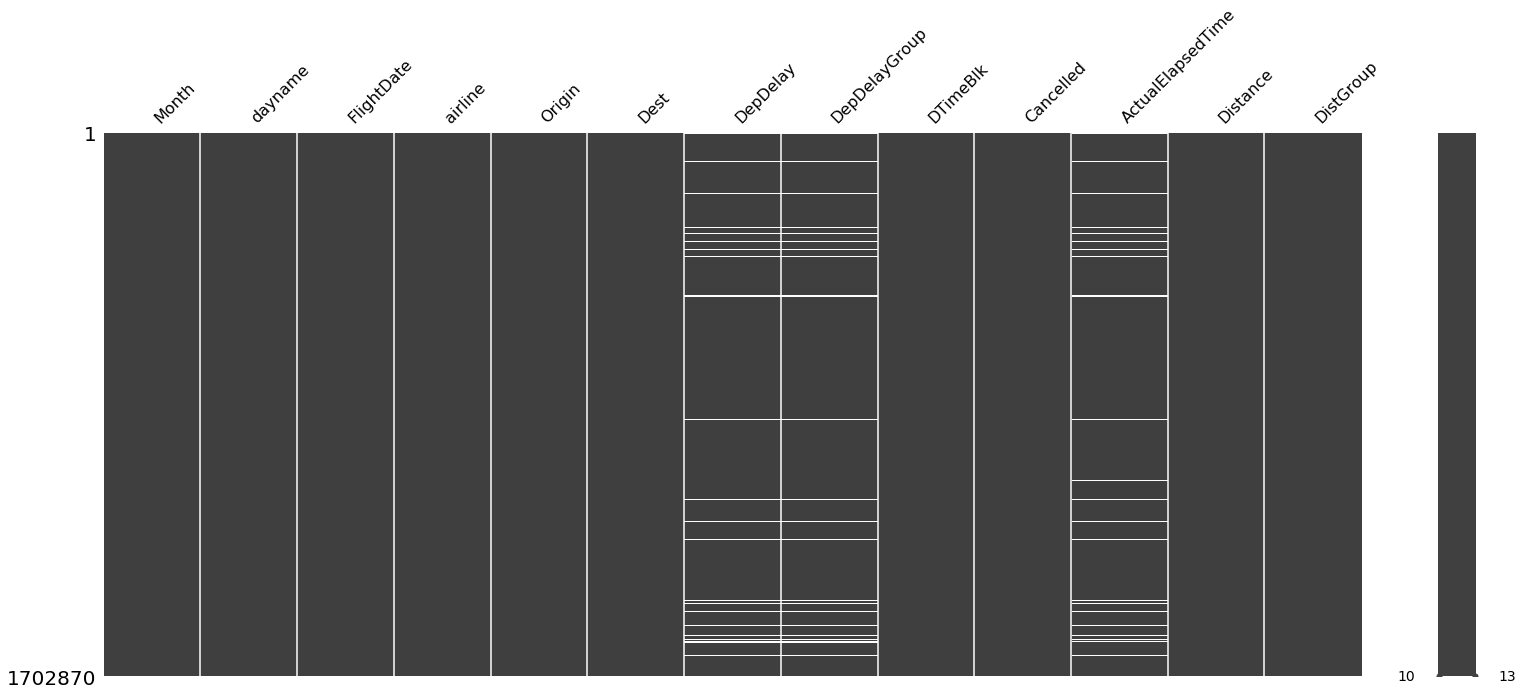

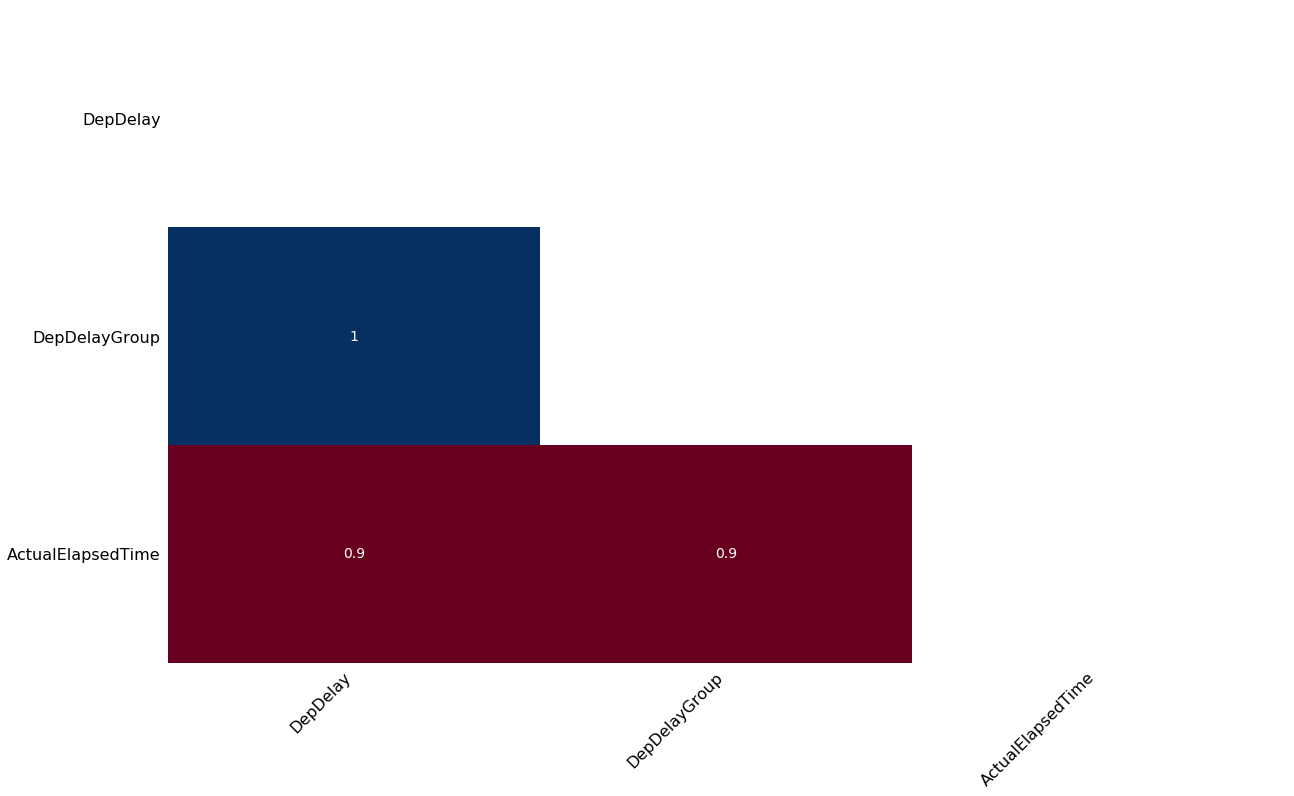

In [36]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

mn.matrix(df.sort_values(by=["Month"]))
mn.heatmap(df.sort_values(by=["Month"]))

In [37]:
df.describe()

,Month,DepDelay,Cancelled,ActualElapsedTime,Distance
count,1.702870e+06,1.658772e+06,1.702870e+06,1.655733e+06,1.702870e+06
mean,2.024586e+00,8.798357e+00,2.550929e-02,1.371467e+02,7.963296e+02
std,8.328226e-01,4.323299e+01,1.576660e-01,7.317174e+01,5.907165e+02
min,1.000000e+00,-1.140000e+02,0.000000e+00,1.600000e+01,3.100000e+01
25%,1.000000e+00,-6.000000e+00,0.000000e+00,8.400000e+01,3.620000e+02
50%,2.000000e+00,-2.000000e+00,0.000000e+00,1.190000e+02,6.380000e+02
75%,3.000000e+00,6.000000e+00,0.000000e+00,1.680000e+02,1.034000e+03
max,3.000000e+00,2.482000e+03,1.000000e+00,7.390000e+02,4.983000e+03


##### 